# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



# Data Pre-Processing:

In [169]:
# Common library imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from plot_utils import plot_results
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

In [170]:
# Data pre-processing
## We base our pre-processing on the raw alldata.xlsx information, which includes a complete overview of all the responses associated with each candidate and party affiliation.
raw_data = pd.read_excel('alldata.xlsx')

## Display the head of the raw data, for visual inspection:
display(raw_data.head())

## Since it is a requirement that each party have a specific color, I create a dictionary here, with these colors defined:
party_colors = {
    "Socialdemokratiet": "#b32722",
    "Radikale Venstre": "#713280",
    "Det Konservative Folkeparti": "#9eba27",
    "Nye Borgerlige": "#054f5c",
    "Socialistisk Folkeparti": "#dd0878",
    "Liberal Alliance": "#21c6cf",
    "Kristendemokraterne": "#bababa",
    "Moderaterne": "#6c39e5",
    "Dansk Folkeparti": "#f3cd41",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "#00e66a",
    "Venstre": "#006697",
    "Danmarksdemokraterne": "#8ac3ff",
    "Enhedslisten": "#ed8019",
    "Alternativet": "#2a8f39",
    "Løsgænger": "#8c564b"
}

530  531  533  534  535  537  538  540  541  543  ...  9a  9b  10a  10b  \
0   -1   -2    1   -2    2    1   -2    1    1    2  ...   2   0    1   -2   
1    2    2   -1   -2   -1   -2    1   -2    2   -2  ...  -2   0   -1    2   
2    2    1   -2   -2    1   -2    1   -1    1   -1  ...  -1  -2    0    2   
3    2    1   -2   -1    1    1    1    1    1   -2  ...  -2   2    2    2   
4    1    1   -2    2   -2    1   -2    1    2   -2  ...  -2   0   -1    0   

   11a  11b  12a  12b               storkreds  alder  
0   -2    1    1    1    Københavns Storkreds     78  
1    1   -2    0    0          Fyns Storkreds     64  
2    0   -1    1   -2     Bornholms Storkreds     37  
3    2   -1    2    0  Nordjyllands Storkreds     28  
4   -2    0    2   -2    Københavns Storkreds     58  

[5 rows x 53 columns]

# Data Analysis: Age of Candidates grouped by party


Age stats grouped by party:


count   min   max       mean  \
parti                                                                       
Alternativet                                  65.0  21.0  79.0  47.415385   
Danmarksdemokraterne                          37.0  24.0  69.0  51.216216   
Dansk Folkeparti                              49.0  20.0  75.0  45.530612   
Det Konservative Folkeparti                   94.0  20.0  66.0  44.723404   
Enhedslisten                                  71.0  19.0  74.0  42.225352   
Frie Grønne, Danmarks Nye Venstrefløjsparti   26.0  20.0  62.0  34.807692   
Kristendemokraterne                           41.0  21.0  73.0  50.219512   
Liberal Alliance                              68.0  18.0  72.0  37.970588   
Løsgænger                                      3.0  40.0  58.0  48.000000   
Moderaterne                                   42.0  19.0  78.0  44.261905   
Nye Borgerlige                                50.0  20.0  70.0  48.520000   
Radikale Venstre                              67.0  21.0  76.0  44.955224   
Socialdemokratiet                             85.0  20.0  78.0  45.388235   
Socialistisk Folkeparti                       69.0  20.0  68.0  41.521739   
Venstre                                       84.0  18.0  69.0  46.678571   

                                                   std  mode    25%   50%  \
parti                                                                       
Alternativet                                 13.620862    50  39.00  48.0   
Danmarksdemokraterne                         10.252737    40  45.00  53.0   
Dansk Folkeparti                             12.191360    42  39.00  47.0   
Det Konservative Folkeparti                  11.904101    53  37.00  48.0   
Enhedslisten                                 15.193229    35  31.00  41.0   
Frie Grønne, Danmarks Nye Venstrefløjsparti  10.777826    26  27.50  33.0   
Kristendemokraterne                          13.441563    47  43.00  50.0   
Liberal Alliance                             13.736291    32  26.00  37.0   
Løsgænger                                     9.165151    40  43.00  46.0   
Moderaterne                                  13.778845    45  35.25  45.0   
Nye Borgerlige                               12.241182    46  42.25  49.5   
Radikale Venstre                             12.395543    33  36.00  45.0   
Socialdemokratiet                            11.641566    44  37.00  45.0   
Socialistisk Folkeparti                      13.538191    26  29.00  42.0   
Venstre                                      12.238750    49  38.00  48.0   

                                               75%  
parti                                               
Alternativet                                 58.00  
Danmarksdemokraterne                         59.00  
Dansk Folkeparti                             54.00  
Det Konservative Folkeparti                  53.00  
Enhedslisten                                 53.50  
Frie Grønne, Danmarks Nye Venstrefløjsparti  37.50  
Kristendemokraterne                          61.00  
Liberal Alliance                             46.00  
Løsgænger                                    52.00  
Moderaterne                                  52.75  
Nye Borgerlige                               56.50  
Radikale Venstre                             54.00  
Socialdemokratiet                            53.00  
Socialistisk Folkeparti                      52.00  
Venstre                                      57.00


Age distribution visualized


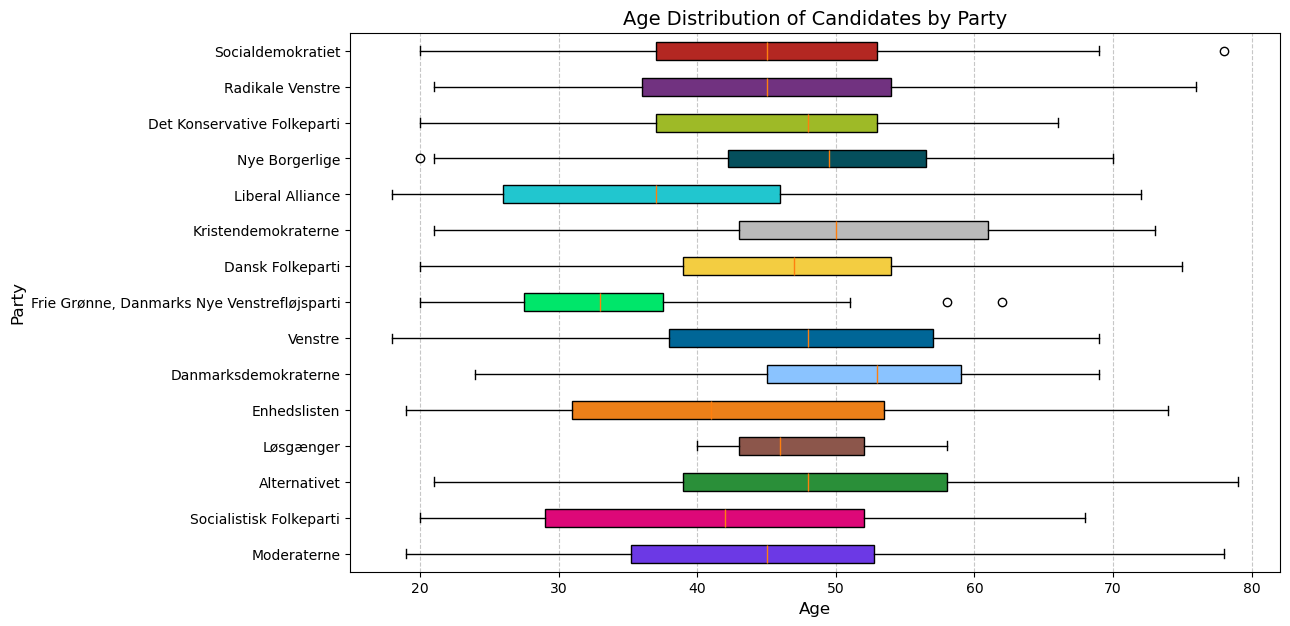

In [171]:
# Data analysis: Age of Candidates grouped by party

## Extract the relevant columns, these being party affiliation and candidate age.
age_data = raw_data[['parti', 'alder']]
#display(age_data)
# 867 entries found

## Note: Some candidates have not given their age! These should (must be) excluded from the data set to avoid skewing the data.
## Thus we need to clean up the data. We remove candidates that have not given their age (ages set to 0)
age_data_cleaned = age_data.loc[age_data['alder'] != 0]
# display(age_data_cleaned)
# 851 entries remaining.

## We now begin our analysis of the candidates grouped by party.
## We are interested in analysing for each party what are the: Max age, Min Age, Median/Average Age, Standard age deviation, age medians across quartiles of the dataset (25%, 50%, 75%) and the most frequently occurring (mode) age.
age_data_cleaned_groupedByParty = age_data_cleaned.groupby(['parti'])

## Compute the mean, std, min., max., 25%, 50% and 75% quartiles.
age_data_stats = age_data_cleaned_groupedByParty['alder'].describe()

## Calculate the mode values:
mode_values = age_data_cleaned_groupedByParty['alder'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_values = mode_values.rename("mode")
age_data_stats = age_data_stats.join(mode_values)

## Arrange the columns in my preferred order: number_of_candidates, min. age, max. age, mean age, standard age deviation, age mode and data for each quartile.
column_order = ['count', 'min', 'max', 'mean', 'std', 'mode', '25%', '50%', '75%']
age_data_stats = age_data_stats[column_order]

print("\nAge stats grouped by party:")
display(age_data_stats)

print("\nAge distribution visualized")
parties = age_data_cleaned['parti'].unique()
data = [age_data_cleaned.loc[age_data_cleaned['parti'] == party, 'alder'] for party in parties]

plt.figure(figsize=(12, 7))
box = plt.boxplot(data, vert=False, patch_artist=True, tick_labels=parties)

for patch, label in zip(box['boxes'], parties):
    color = party_colors.get(label, "#7f7f7f")
    patch.set_facecolor(color)

plt.xlabel("Age", fontsize=12)
plt.ylabel("Party", fontsize=12)
plt.title("Age Distribution of Candidates by Party", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


The above data analysis highlights a few peculiar facts about the different parties. Below I discuss a few observations.

### Youngest vs. Oldest party.
The party for the youngsters is 'Frie Grønne, Danmarks Nye Venstrefløjsparti', with a mean age pr. candidate of 35 and a standard-deviation of 10. Meaning most candidates affiliated with this party are between 25 and 45 years old. Liberal Alliance is another party with relative young candidates. Their average age is slightly higher at 38, but their standard deviation is also slightly higher at ca. 14, meaning most candidates in this party age between 24 and 52 years old. So while 'Frie Grønne' is "mostly for the youngest candidates", Liberal Alliance seems to have managed to grab the attention of the younger candidates, while still maintaining a presence amongst the slightly more mature.

The party for the elderly is Danmarksdemokraterne, with a mean age pr. candidate of ca. 51. This party also maintains the highest minimum candidate age at 24. Additionally the bulk of Danmarksdemokraternes candidates are amongst the oldest candidates on the list, with 50% percent of their candidates being aged between 45 and 59 years of age.

### Party with the largest deviation in age
The party with the largest mean deviation between their candidates is enhedslisten, with a standard deviation of ca. 15 years. This could point towards Enhedslisten having some success in maintaining interest amongst the broadest spectrum of candidates (and perhaps voters), when looking at age.

# Data Analysis: Candidate Confidence

In [172]:
# We start by working on the raw data set. We add a column used to count the number of occurrences of either 'strongly agree' or 'strongly disagree', so we have something to filter and sort after
candidate_confidence_data = raw_data
candidate_confidence_data['confidence'] = candidate_confidence_data.apply(lambda row: sum(1 for value in row if value in {-2, 2}), axis=1)
print("Display added confidence info, for visual inspection:")
display(candidate_confidence_data.head())

# We can now filter the data set, leaving only the confidence column along columns containing the candidate names, 'storkreds' and party affiliations
candidate_confidence_data_filtered = raw_data[['navn', 'parti', 'storkreds', 'confidence']]

# Lets display the 20 candidates with the highest levels of confidence:
#candidate_confidence_data_filtered = candidate_confidence_data_filtered.sort_values(by='confidence', ascending=False, inplace=True)
with pd.option_context('display.max_rows', 20):
    display(candidate_confidence_data_filtered.sort_values(by='confidence', ascending=False).head(20))

Display added confidence info, for visual inspection:


530  531  533  534  535  537  538  540  541  543  ...  9b  10a  10b  11a  \
0   -1   -2    1   -2    2    1   -2    1    1    2  ...   0    1   -2   -2   
1    2    2   -1   -2   -1   -2    1   -2    2   -2  ...   0   -1    2    1   
2    2    1   -2   -2    1   -2    1   -1    1   -1  ...  -2    0    2    0   
3    2    1   -2   -1    1    1    1    1    1   -2  ...   2    2    2    2   
4    1    1   -2    2   -2    1   -2    1    2   -2  ...   0   -1    0   -2   

   11b  12a  12b               storkreds  alder  confidence  
0    1    1    1    Københavns Storkreds     78          25  
1   -2    0    0          Fyns Storkreds     64          25  
2   -1    1   -2     Bornholms Storkreds     37          22  
3   -1    2    0  Nordjyllands Storkreds     28          33  
4    0    2   -2    Københavns Storkreds     58          31  

[5 rows x 54 columns]

navn  \
505                    Sarah Nørris   
88                    Søren Vanting   
559             Kim Andkjær Doberck   
152                      Rashid Ali   
44                Mohamed Abdikarim   
503                     Jan Filbært   
151                Elise Bjerkrheim   
284                      John Bjerg   
437             Lone Vase Langballe   
359                  Frank Sørensen   
637                     Simon Hampe   
810                    Asham Nadeem   
557                  Thomas Vedsted   
46                 Kim Christiansen   
789               Qasam Nazir Ahmad   
149                  Daniel Tomicic   
235                 Janne Toft-Lind   
231                    Jef Seistrup   
748                Steffen Sjørslev   
53   Henning Østergaard-Christensen   

                                           parti                    storkreds  \
505                                 Enhedslisten        Sydjyllands Storkreds   
88                   Det Konservative Folkeparti        Østjyllands Storkreds   
559                               Nye Borgerlige        Sydjyllands Storkreds   
152  Frie Grønne, Danmarks Nye Venstrefløjsparti         Københavns Storkreds   
44   Frie Grønne, Danmarks Nye Venstrefløjsparti        Østjyllands Storkreds   
503                                 Enhedslisten        Sydjyllands Storkreds   
151  Frie Grønne, Danmarks Nye Venstrefløjsparti         Københavns Storkreds   
284                               Nye Borgerlige       Nordjyllands Storkreds   
437                             Dansk Folkeparti       Vestjyllands Storkreds   
359                             Dansk Folkeparti               Fyns Storkreds   
637                             Dansk Folkeparti          Sjællands Storkreds   
810  Frie Grønne, Danmarks Nye Venstrefløjsparti  Københavns Omegns Storkreds   
557                               Nye Borgerlige        Sydjyllands Storkreds   
46                              Dansk Folkeparti        Østjyllands Storkreds   
789                                 Alternativet  Københavns Omegns Storkreds   
149  Frie Grønne, Danmarks Nye Venstrefløjsparti         Københavns Storkreds   
235                                 Enhedslisten       Nordjyllands Storkreds   
231                                 Alternativet       Nordjyllands Storkreds   
748                             Liberal Alliance      Nordsjællands Storkreds   
53                           Kristendemokraterne        Østjyllands Storkreds   

     confidence  
505          49  
88           49  
559          44  
152          43  
44           43  
503          42  
151          42  
284          42  
437          42  
359          42  
637          41  
810          41  
557          41  
46           41  
789          41  
149          40  
235          40  
231          40  
748          40  
53           40

### Comment:
Sarah Nørris (Ø) and Søren Vanting (C) are tied as the most confidant candidates. Amongst the top 20 we also find that 12/20 of the candidates are from Jutland, while the remainders are divided between Sjælland and Fyn. A peculiar observation, considering that the population on Sjælland is larger than Jutland.

# Data Analysis: Candidate response differences inter-party and intra-party
For the intra-party candidate differences I approach this task by separating the candidate responses by party affiliation.
Next I plot, for each question, the variation in responses for all party affiliated candidates in a box plot.
This approach will allow for rapid overview over how the candidates in each party have answered each question, and if there are any questions with significant outliers.


Candidate Responses visualized


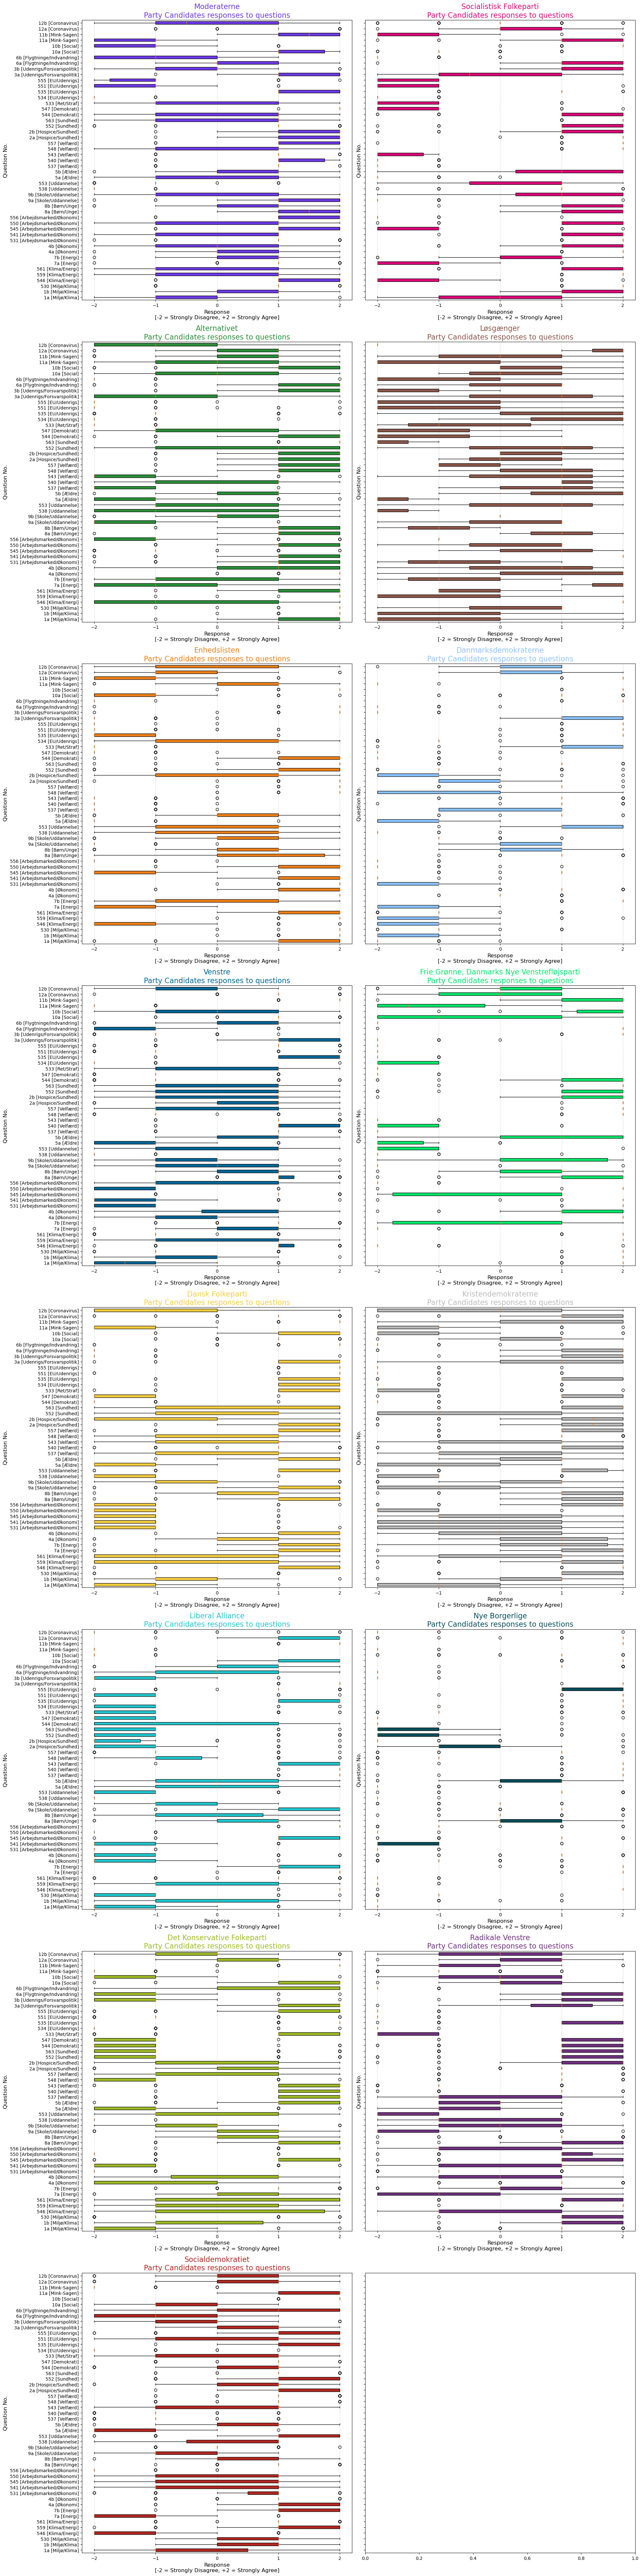

In [173]:
# Let's first prepare the data:
intra_party_response_data = raw_data
intra_party_response_data = intra_party_response_data.drop(columns=['storkreds', 'alder', 'navn', 'confidence'])

# Group the question answers by party and compute statistics:
intra_party_response_data_grouped_by_party = intra_party_response_data.groupby(['parti']).describe()

question_columns = ['1a', '1b', '530', '546', '559', '561', '7a', '7b', '4a', '4b', '531', '541', '545', '550', '556', '8a', '8b', '9a', '9b',
                    '538', '553', '5a', '5b', '537', '540', '543', '548', '557', '2a', '2b', '552', '563', '544', '547', '533', '534', '535',
                    '551', '555', '3a', '3b', '6a', '6b', '10a', '10b', '11a', '11b', '12a', '12b']

question_labels = ['1a [Miljø/Klima]', '1b [Miljø/Klima]', '530 [Miljø/Klima]', '546 [Klima/Energi]', '559 [Klima/Energi]', '561 [Klima/Energi]', '7a [Energi]', '7b [Energi]',
                   '4a [Økonomi]', '4b [Økonomi]', '531 [Arbejdsmarked/Økonomi]', '541 [Arbejdsmarked/Økonomi]', '545 [Arbejdsmarked/Økonomi]', '550 [Arbejdsmarked/Økonomi]',
                   '556 [Arbejdsmarked/Økonomi]', '8a [Børn/Unge]', '8b [Børn/Unge]', '9a [Skole/Uddannelse]', '9b [Skole/Uddannelse]', '538 [Uddannelse]', '553 [Uddannelse]',
                   '5a [Ældre]', '5b [Ældre]', '537 [Velfærd]', '540 [Velfærd]', '543 [Velfærd]', '548 [Velfærd]', '557 [Velfærd]', '2a [Hospice/Sundhed]', '2b [Hospice/Sundhed]',
                   '552 [Sundhed]', '563 [Sundhed]', '544 [Demokrati]', '547 [Demokrati]', '533 [Ret/Straf]', '534 [EU/Udenrigs]', '535 [EU/Udenrigs]', '551 [EU/Udenrigs]',
                   '555 [EU/Udenrigs]', '3a [Udenrigs/Forsvarspolitik]', '3b [Udenrigs/Forsvarspolitik]', '6a [Flygtninge/Indvandring]', '6b [Flygtninge/Indvandring]', '10a [Social]',
                   '10b [Social]', '11a [Mink-Sagen]', '11b [Mink-Sagen]', '12a [Coronavirus]', '12b [Coronavirus]']

# Create multiple subplots for easy visual comparison between parties
print("\nCandidate Responses visualized")
fig, axes = plt.subplots(8, 2, figsize=(20, 80), sharey=True)
axes = axes.flatten()

parties = intra_party_response_data['parti'].unique()

def plot_box(ax, values, party, _party_color):
    box = ax.boxplot(values, vert=False, patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor(_party_color)
        patch.set_edgecolor("black")
    ax.set_yticks(ticks=range(1, len(question_columns) + 1,), labels=question_labels, fontsize=10)
    ax.set_xticks(range(-2, 3))
    ax.set_title(f"{party}\nParty Candidates responses to questions", color=_party_color, fontsize=16)
    ax.set_xlabel("Response\n[-2 = Strongly Disagree, +2 = Strongly Agree]", fontsize=12)
    ax.set_ylabel("Question No.", fontsize=12)
    ax.grid(axis="x", linestyle="--", alpha=0.6)

i = 0
for party in parties:
    party_color = party_colors.get(party, "#7f7f7f")
    filtered_data = intra_party_response_data[intra_party_response_data['parti'] == party]
    data = [filtered_data[col].dropna().tolist() for col in question_columns]
    plot_box(axes[i], data, party, party_color)
    i += 1

plt.tight_layout()
plt.show()

### Comment
The data analysis and visualization of the intra-party responses presented above show that certain parties are quite aligned in their political standpoints across the board, while others are quite split.

Looking at the parties with <b>least</b> intra-party disagreements, we must visually identify the parties presented where as many as possible of the 'boxes' are either exactly 1 response wide or varies between 2 response categories.

- Nye Borgerlige takes the lead as least internal disagreements. Most of their candidates answers are generally aligned with each other, with slight variances for the bulk (50%) of their candidates on 7 questions.

Looking at the parties with the <b>most</b> intra-party disagreements, we must identify the parties with the least responses that are identical, or where the boxes on the plots are as wide as possible over many responses.

- Løsgængere is not a political party, so it shouldn't surprise as this is where the most disagreement is found. With mostly identical answers for only 4 of the questions and large variations in the other responses, this is the group with the most disagreements.
- Kristendemokraterne is the political party with the most internal disagreement. The bulk (50%) of their candidates only agree fully on 7 questions, with large deviations across the board on the remaining questions.

## Interparty variations:
To evaluate interparty variations I collapse the parties differing responses into a number of single graphs, where I display a graph for each question with the party responses visually displayed for analysis


Party Responses to each question visualized


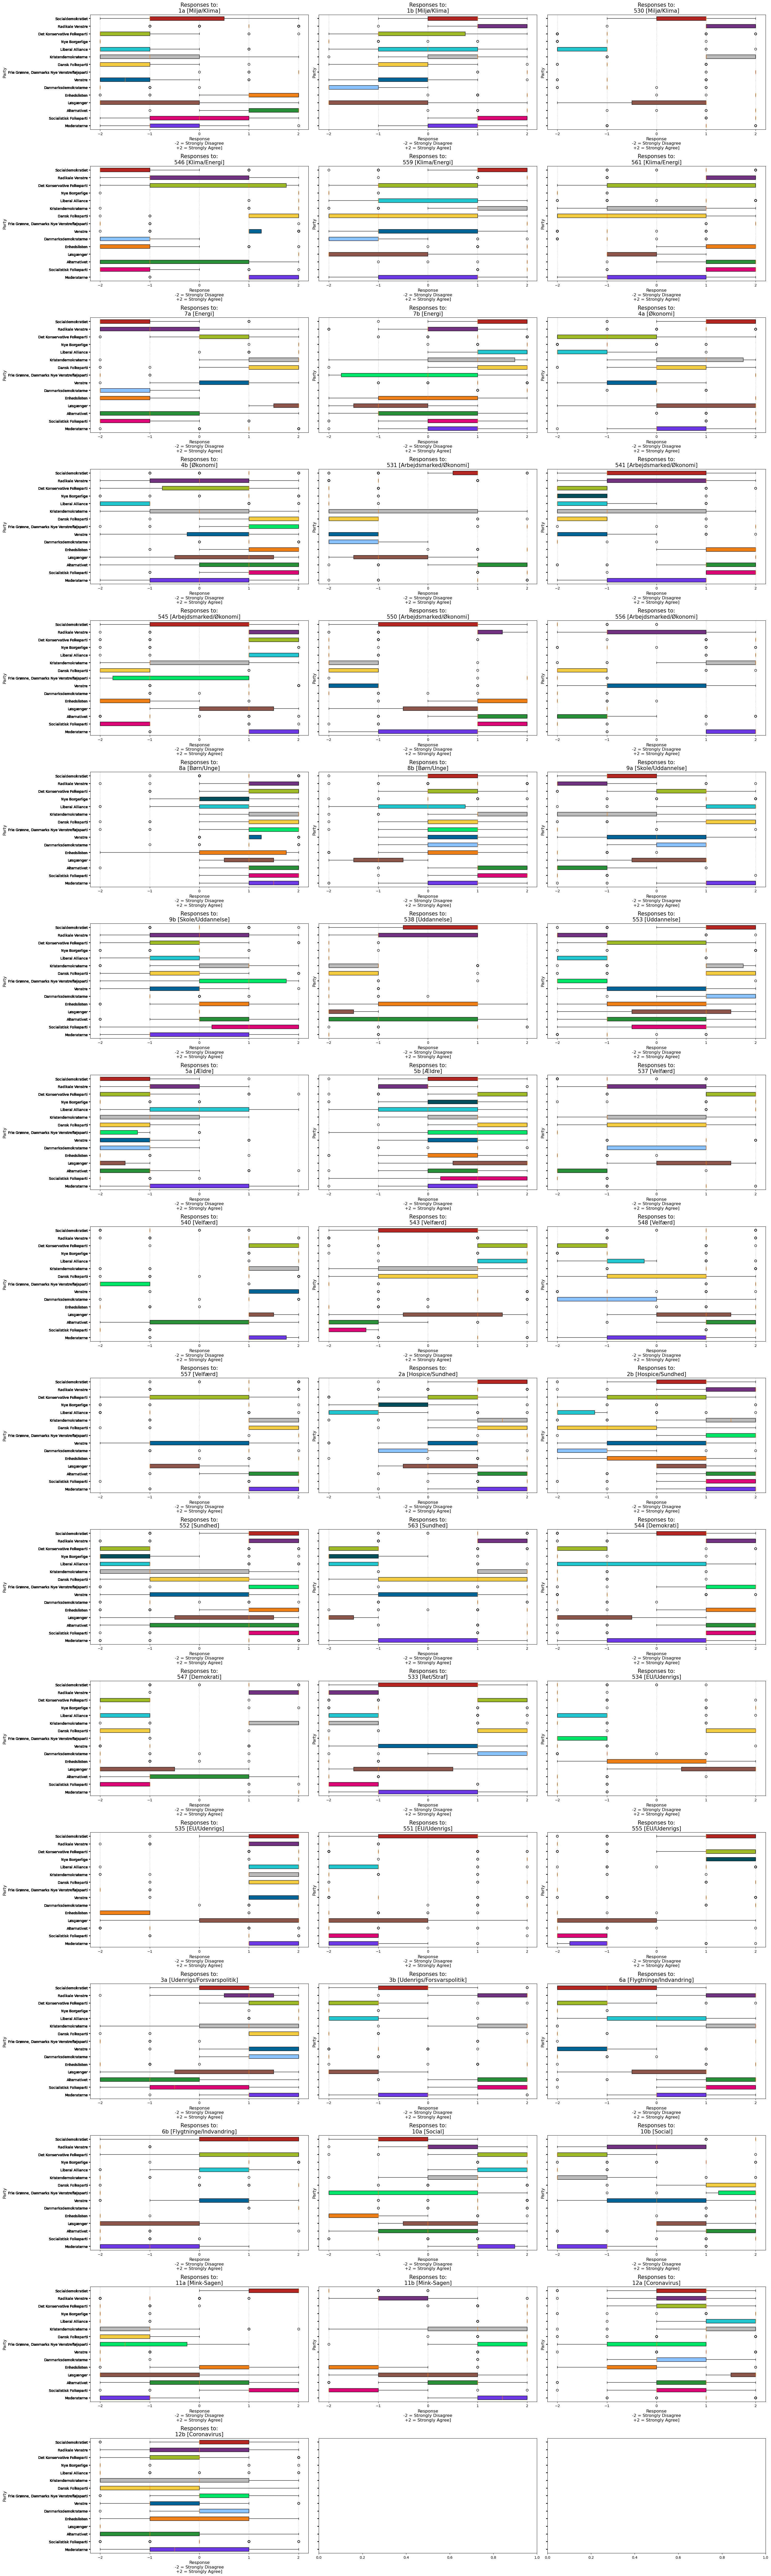

In [174]:
# Let's first prepare the data:
intra_party_response_data = raw_data
intra_party_response_data = intra_party_response_data.drop(columns=['storkreds', 'alder', 'navn', 'confidence'])

# Group the question answers by party and compute statistics:
intra_party_response_data_grouped_by_party = intra_party_response_data[question_columns]
intra_party_response_data_grouped_by_party = intra_party_response_data_grouped_by_party.join(intra_party_response_data['parti'])
intra_party_response_data_grouped_by_party = intra_party_response_data_grouped_by_party.groupby(['parti']).describe()
intra_party_response_data_grouped_by_party = intra_party_response_data_grouped_by_party.reindex(columns=question_columns, level=0)

question_columns = ['1a', '1b', '530', '546', '559', '561', '7a', '7b', '4a', '4b', '531', '541', '545', '550', '556', '8a', '8b', '9a', '9b',
                    '538', '553', '5a', '5b', '537', '540', '543', '548', '557', '2a', '2b', '552', '563', '544', '547', '533', '534', '535',
                    '551', '555', '3a', '3b', '6a', '6b', '10a', '10b', '11a', '11b', '12a', '12b']

question_labels = ['1a [Miljø/Klima]', '1b [Miljø/Klima]', '530 [Miljø/Klima]', '546 [Klima/Energi]', '559 [Klima/Energi]', '561 [Klima/Energi]', '7a [Energi]', '7b [Energi]',
                   '4a [Økonomi]', '4b [Økonomi]', '531 [Arbejdsmarked/Økonomi]', '541 [Arbejdsmarked/Økonomi]', '545 [Arbejdsmarked/Økonomi]', '550 [Arbejdsmarked/Økonomi]',
                   '556 [Arbejdsmarked/Økonomi]', '8a [Børn/Unge]', '8b [Børn/Unge]', '9a [Skole/Uddannelse]', '9b [Skole/Uddannelse]', '538 [Uddannelse]', '553 [Uddannelse]',
                   '5a [Ældre]', '5b [Ældre]', '537 [Velfærd]', '540 [Velfærd]', '543 [Velfærd]', '548 [Velfærd]', '557 [Velfærd]', '2a [Hospice/Sundhed]', '2b [Hospice/Sundhed]',
                   '552 [Sundhed]', '563 [Sundhed]', '544 [Demokrati]', '547 [Demokrati]', '533 [Ret/Straf]', '534 [EU/Udenrigs]', '535 [EU/Udenrigs]', '551 [EU/Udenrigs]',
                   '555 [EU/Udenrigs]', '3a [Udenrigs/Forsvarspolitik]', '3b [Udenrigs/Forsvarspolitik]', '6a [Flygtninge/Indvandring]', '6b [Flygtninge/Indvandring]', '10a [Social]',
                   '10b [Social]', '11a [Mink-Sagen]', '11b [Mink-Sagen]', '12a [Coronavirus]', '12b [Coronavirus]']

# Create multiple subplots for easy visual comparison between parties
print("\nParty Responses to each question visualized")
fig, axes = plt.subplots(17, 3, figsize=(30, 100), sharey=True)
axes = axes.flatten()

parties = intra_party_response_data['parti'].unique()

def plot_box(ax, values, _question):
    _box = ax.boxplot(values, vert=False, patch_artist=True, tick_labels=parties)

    for _patch, _party in zip(_box['boxes'], parties):
        _patch.set_facecolor(party_colors.get(_party, "#7f7f7f"))

    ax.set_xticks(range(-2, 3))
    for question_label in question_labels:
        words = question_label.split()
        if _question in words[0]:
            ax.set_title(f"Responses to:\n{question_label}", fontsize=15)
            break

    ax.set_xlabel("Response\n-2 = Strongly Disagree\n+2 = Strongly Agree]", fontsize=12)
    ax.set_ylabel("Party", fontsize=12)
    ax.grid(axis="x", linestyle="--", alpha=0.6)

i = 0
for question in question_columns:
    data = [intra_party_response_data[intra_party_response_data['parti'] == party][question].dropna().tolist() for party in parties]
    plot_box(axes[i], data, question)
    i += 1

plt.tight_layout()
plt.show()

### Comments
From the above visualization of the inter-party responses, we can see that the parties generally agree on these political issues:
- Coronavirus response (Questions 12a and 12b), where most parties center around '0' (neither agree nor disagree) with a few outliers.
- Ældre (Questions 5a and 5b), where most parties gather at the same extremity. This indicates a shared policy on the elderly.
- Børn og Unge (Questions 8a and 8b), where most parties share a common standpoint at one of the extremities of the scale.

# Machine Learning: Decision Tree, Random Forest & Gradient Boosted Tree models to predict Candidate party affiliation

Now I develop classification models to predict candidates' party affiliations. After which I will investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions.
I will use the following algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

## Data Preparation
First I prepare the data, re-loading from the excel file, sorting out irrelevant columns and dividing into features (X) and target (y).


In [175]:
# Import the data:
raw_model_data = pd.read_excel('alldata.xlsx')

# Remove non-relevant columns for training/testing, such as 'navn', 'storkreds', 'alder'. I want to focus on predicting parti based on political answers - not other factors such as 'storkreds' or 'alder'.
# 'parti' will become the target.
filtered_model_data = raw_model_data.drop(columns=['navn', 'storkreds', 'alder'])

# Filter out any missing data (such as NaN values):
filtered_model_data = filtered_model_data.dropna()

# Filter out any løsgængere, since these don't actually below to any party (and it could be interesting to evaluate which party they would belong to, with the trained models :) )
filtered_model_data = filtered_model_data[filtered_model_data['parti'] != "Løsgænger"].copy()

# Define the y (target) and X (features).
y_target = filtered_model_data['parti']
X_features = filtered_model_data.drop(columns=['parti'])

# Scale the data: We actually skip this step, since it shouldn't have an effect on classification models, as they simply compare features to each other.
#scaler = StandardScaler()
#X_features = scaler.fit_transform(X_features)

# Define the training data and test data. We use 85% for training and 15% for testing:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.15, random_state=555)

## Training the Decision Tree



In [176]:
# I pre-prune the decision tree to prevent a complete binary search tree. The min_impurity value took some testing to set at a good value, but I ended up with a solid value of 0.005.
#tree_clf = DecisionTreeClassifier(min_impurity_decrease=0.005, random_state=555)
#tree_clf.fit(X_train, y_train)

Let's check what this model scores, on training data:

In [177]:
#tree_clf.score(X_train, y_train)

How does this compare to the test data?

In [178]:
#tree_clf.score(X_test, y_test)

The training score of 0.85 indicates that the model lies in a good interval (.7 to 0.85) indicating neither overfitting nor underfitting. Compared to the test-score of 0.71, we see that the model performs slightly worse when verifying with the test-data.

To avoid tuning any decision tree hyperparameters to the test-set, I will first evaluate which parameters result in a hyper-optimised model and then compare these to a computed optimal model using cross validation

First, let's see which max_depth is optimal:

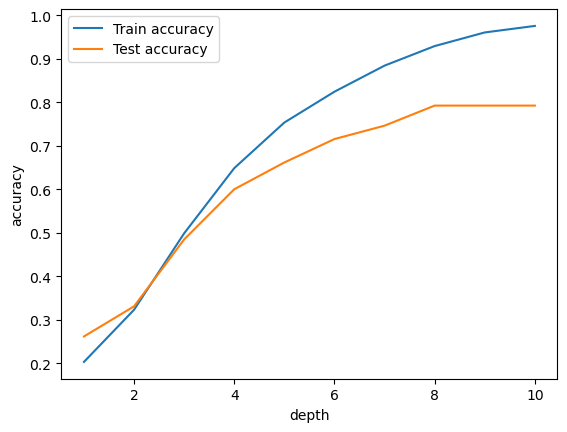

In [179]:
features = range(1, 11)
classifiers = [DecisionTreeClassifier(random_state=555, max_depth=d) for d in features]
for clf in classifiers: clf.fit(X_train, y_train)
train_scores = [clf.score(X_train, y_train) for clf in classifiers]
test_scores = [clf.score(X_test, y_test) for clf in classifiers]
plot_results(train_scores, test_scores, train_label="Train accuracy", test_label="Test accuracy", xlabel="depth", ylabel="accuracy")

Reading from the graph, a max depth of 8 seems like an optimal value, with good test accuracy, while not differing much from the training accuracy.

Now let's evaluate a good min_impurity_decrease value:

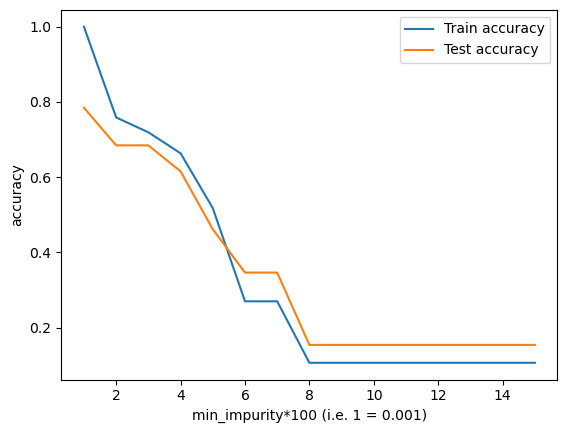

In [180]:
features = range(0, 15)
classifiers = [DecisionTreeClassifier(random_state=555, min_impurity_decrease=(d/100)) for d in features]
for clf in classifiers: clf.fit(X_train, y_train)
train_scores = [clf.score(X_train, y_train) for clf in classifiers]
test_scores = [clf.score(X_test, y_test) for clf in classifiers]
plot_results(train_scores, test_scores, train_label="Train accuracy", test_label="Test accuracy", xlabel="min_impurity*100 (i.e. 1 = 0.001)", ylabel="accuracy")

Accuracy tends to fall quite quickly with increased min_impurity values. However, a value between 0.002 and 0.004 seems like the optimal range, with still a high accuracy on the test data and not too much of a difference with the training accuracy. Let's settle for a value of 0.003!


Now let's evaluate a good min_samples_split value:

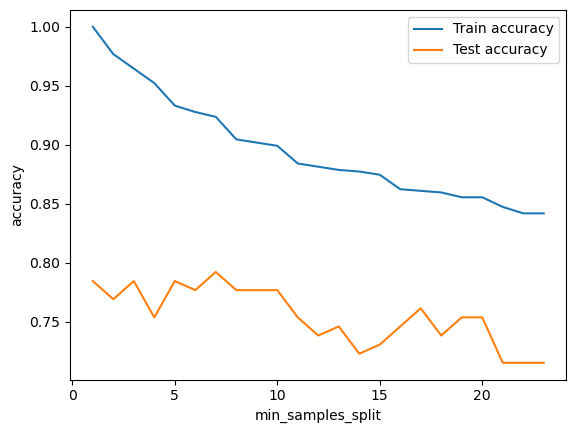

In [181]:
features = range(2, 25)
classifiers = [DecisionTreeClassifier(random_state=555, min_samples_split=d) for d in features]
for clf in classifiers: clf.fit(X_train, y_train)
train_scores = [clf.score(X_train, y_train) for clf in classifiers]
test_scores = [clf.score(X_test, y_test) for clf in classifiers]
plot_results(train_scores, test_scores, train_label="Train accuracy", test_label="Test accuracy", xlabel="min_samples_split", ylabel="accuracy")

This one is harder to lock on to. But a feature count around 18-20 seems optimal, with higher accuracy on the test data and lower difference form the training accuracy. We use a value of 20 going forward.

Now let's build a hyper-tuned Decision Tree using these values:
- max_depth = 8
- min_impurity_decrease = 0.003
- min_samples_split = 20

In [182]:
tree_clf = DecisionTreeClassifier(min_impurity_decrease=0.003, max_depth=8, min_samples_split=20, random_state=555)
tree_clf.fit(X_train, y_train)

print("Training Accuracy:", tree_clf.score(X_train, y_train))
print("Test Accuracy    :", tree_clf.score(X_test, y_test))

Training Accuracy: 0.832425068119891
Test Accuracy    : 0.7615384615384615


These values by themselves do not seem too bad. However, since the model was hyper-tuned to both the training and test data sets we should probably compare to some cross-validation and use that approach to compute the optimal Decision Tree.

In [183]:
depths = range(1, 13)
split_sizes = range(2, 25)
features = range(1, 50)
impurity = np.array([0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008])

params = {'min_samples_split': split_sizes,
          'max_depth': depths,
          'max_features': features,
          'min_impurity_decrease': impurity}

gsc = GridSearchCV(DecisionTreeClassifier(random_state=555), params, n_jobs=-1)
gsc.fit(X_train, y_train)

gsc.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=27,
                       min_impurity_decrease=0.004, min_samples_split=4,
                       random_state=555)

In [184]:
print("Cross Validation Decision Tree Score: ", gsc.score(X_train, y_train), gsc.score(X_test, y_test))

Cross Validation Decision Tree Score:  0.8392370572207084 0.7538461538461538


Cross validation shows that the optimal Decision Tree model has the parameters described below, and performs about the same as our hyper tuned model:
- max_depth = 10
- max_features = 27
- min_samples_split = 4
- min_impurity_decrease = 0.004

We will thus be using these values going forward, since they are not hit by the same bias as the hyper-tuned values from earlier.

In [185]:
final_decision_tree_clf_model = DecisionTreeClassifier(max_depth=10, min_samples_split=4, max_features=27, min_impurity_decrease=0.004, random_state=555)
final_decision_tree_clf_model.fit(X_train, y_train)
print("Final Decision Tree Score: ", final_decision_tree_clf_model.score(X_train, y_train), final_decision_tree_clf_model.score(X_test, y_test))

Final Decision Tree Score:  0.8392370572207084 0.7538461538461538


## Training the Random Forest

We have established a baseline through our training and validation of the Final Decision Tree model.
To further evaluate towards the most optimal model, we can train a Random Forest (i.e. build many individual decision trees and then overlay them over each other, building a model that draws from the strengths of a multitude of decision trees).

When training our forest, we use the values initially found for the optimal Decision Tree and apply these in the forest environment.

In order to find the most optimal random forest classification model, we start by generating a number of random forest and displaying these on a graph, so we can evaluate how many estimations we should use.


We use the values found during our earlier tuning, for each decision tree.

C:\Users\krige\miniconda3\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


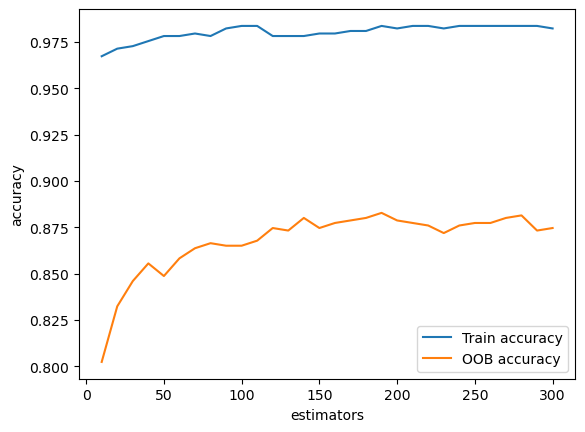

In [188]:
estimators = [n * 10 for n in range(1, 31)]

classifiers = [RandomForestClassifier(random_state=555, warm_start=True, oob_score=True, max_depth=10, min_samples_split=4, max_features=27, min_impurity_decrease=0.004, n_estimators=n) for n in estimators]
for clf in classifiers: clf.fit(X_train, y_train)

train_scores = [clf.score(X_train, y_train) for clf in classifiers]
oob_scores = [clf.oob_score_ for clf in classifiers]
plot_results(train_scores, oob_scores, train_label="Train accuracy", test_label="OOB accuracy", xlabel="estimators", ylabel="accuracy", xvalues = estimators)

We see that the sweet spot (optimal number of estimations) lies around 140 estimators. We use this value to build our final random forest model:

In [189]:
final_forest_clf_model = RandomForestClassifier(random_state=504, max_depth=10, min_samples_split=4, max_features=27, min_impurity_decrease=0.004, n_estimators=140)
final_forest_clf_model.fit(X_train, y_train)

print("Final Random Forest Score:", final_forest_clf_model.score(X_train, y_train), final_forest_clf_model.score(X_test, y_test))


Final Random Forest Score: 0.9782016348773842 0.8615384615384616


The test scores seem pretty good - but the training score points towards overfitting. If I were to improve these values further I'd need even more data.

## Training the Gradient Boosted Tree

The gradient boosted tree is similar to the Random Forest principle. However, while the random forest principle computes a number decision tress concurrently, before adding them together - the Gradient Boosted Tree computes 1 decision tree at a time and appends the results from previous trees on top of the newly trained ones. This results in a model that becomes better the more trees are trained.

We build upon some of our hyper parameters from before setting these parameters:
- n_estimators: 140, since this was the optimal number of estimators used in the random forest. And more trees -> More precise model.
- min_samples_split = 4, from our initial baseline optimal Decision Tree.
- max_features = 27, from our initial baseline optimal Decision Tree.
- min_impurity_decrease = 0.004, from our initial baseline optimal Decision Tree.

The max_depth we set to 4, instead of the previous 10 - since the idea of the Gradient Boosted Tree is to use shallow trees that build upon each other, slowly refining the model as more trees are processed.

In [190]:
gbt_clf_model = GradientBoostingClassifier(n_estimators=140, learning_rate=0.1, max_depth=4, min_samples_split=4, max_features=27, min_impurity_decrease=0.004, random_state=555)
gbt_clf_model.fit(X_train, y_train)
print("Initial Gradient Boosting Score:", gbt_clf_model.score(X_train, y_train))

Initial Gradient Boosting Score: 1.0


Let's see if we can't improve this accuracy by using the GridSearch principle from before, and trying different values of especially n_estimators, learning_rate and max_depth. The rest we keep the same, initially.

In [191]:
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150, 175],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_impurity_decrease': [0.004],
    'min_samples_split': [4],
    'random_state': [555]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_impurity_decrease': 0.004, 'min_samples_split': 4, 'n_estimators': 50, 'random_state': 555}
0.8733296058149287


Based on the above found 'best parameters' we can now establish/train our final gradient boosted tree model:

In [192]:
final_gbt_clf_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, min_samples_split=4, max_features=27, min_impurity_decrease=0.004, random_state=555)
final_gbt_clf_model.fit(X_train, y_train)
print("Final Gradient Boosting Score:", final_gbt_clf_model.score(X_train, y_train))

Final Gradient Boosting Score: 1.0


In [193]:
# Make predictions on all the final models, and check each model's f1_score an accuracy:
y_pred_final_decision_tree_model = final_decision_tree_clf_model.predict(X_test)
y_pred_final_forest_clf_model = final_forest_clf_model.predict(X_test)
y_pred_final_gbt_clf_model = final_gbt_clf_model.predict(X_test)

# Compute each models accuracy:
accuracy_final_decision_tree_clf_model = accuracy_score(y_test, y_pred_final_decision_tree_model)
accuracy_final_forest_clf_model = accuracy_score(y_test, y_pred_final_forest_clf_model)
accuracy_final_gbt_clf_model = accuracy_score(y_test, y_pred_final_gbt_clf_model)

print(f"final_decision_tree_model Accuracy: {accuracy_final_decision_tree_clf_model:.2f}")
print(f"final_forest_clf_model Accuracy: {accuracy_final_forest_clf_model:.2f}")
print(f"final_gbt_clf_model Accuracy: {accuracy_final_gbt_clf_model:.2f}\n")

# Compute each models f1_score:
f1_score_final_decision_tree_clf_model = f1_score(y_test, y_pred_final_decision_tree_model, average='weighted')
f1_score_final_forest_clf_model = f1_score(y_test, y_pred_final_forest_clf_model, average='weighted')
f1_score_final_gbt_clf_model = f1_score(y_test, y_pred_final_gbt_clf_model, average='weighted')

print(f"final_decision_tree_model f1_score: {f1_score_final_decision_tree_clf_model:.2f}")
print(f"final_forest_clf_model f1_score: {f1_score_final_forest_clf_model:.2f}")
print(f"final_gbt_clf_model f1_score: {f1_score_final_gbt_clf_model:.2f}")




final_decision_tree_model Accuracy: 0.75
final_forest_clf_model Accuracy: 0.86
final_gbt_clf_model Accuracy: 0.86

final_decision_tree_model f1_score: 0.75
final_forest_clf_model f1_score: 0.86
final_gbt_clf_model f1_score: 0.86


From the evaluated scores above, we can now see that both the random forest and the gradient boosted tree models perform with similar accuracy and f1_score. Since they are similar, we just choose to continue working with 1 of them.

I will be using the random forest, for the remaining analysis in this assignment.




# Investigating if there are party members, who don't "belong" in their current parties:
To do this, we use our original data set (reduced to the same features used for training) and then predict party affiliation with our models based on this.

I then will display the candidates who seem to not be in the right party, based on the model predictions.

In [194]:
# I prepare the feature data:
X_final_features = raw_model_data.copy()
X_final_features = X_final_features.drop(columns=['storkreds', 'alder', 'navn', 'parti'])

# Now I predict which party each candidate "should" be a member of:
y_PredictedPartyAffiliation = final_forest_clf_model.predict(X_final_features)

# I add the predictions to the raw data:
raw_data_with_predictions = raw_model_data.copy()
raw_data_with_predictions['prediction_party'] = y_PredictedPartyAffiliation

# I now extract the candidates, who would seem to be in the "wrong" party, based on the predictions:
mismatched_candidates = raw_data_with_predictions[raw_data_with_predictions['parti'] != raw_data_with_predictions['prediction_party']]

print("\nCandidates potentially in the 'wrong' party:")
display(mismatched_candidates[['navn', 'parti', 'prediction_party']])


Candidates potentially in the 'wrong' party:


navn                                        parti  \
3       Nicklas Gjedsig Larsen                                 Alternativet   
4               Tom Gillesberg                                    Løsgænger   
8            Chresten H. Ibsen                                    Løsgænger   
89             Per Urban Olsen                  Det Konservative Folkeparti   
129               Emil Samaras                                 Enhedslisten   
139       Linea Søgaard-Lidell                                      Venstre   
140                Bo Sandroos                                      Venstre   
157               Ellen Emilie                                  Moderaterne   
219             Nikoline Prehn                            Socialdemokratiet   
234  Joachim Plaetner Kjeldsen                                 Alternativet   
250           Phillip Sperling                                      Venstre   
275           Dorte M. Nielsen                      Socialistisk Folkeparti   
289        Alexander Klitgaard                  Det Konservative Folkeparti   
322           Andreas Grosbøll                      Socialistisk Folkeparti   
326        Diana-Ester Eriksen                  Det Konservative Folkeparti   
336          Niels Bjarne Lund                                 Enhedslisten   
359             Frank Sørensen                             Dansk Folkeparti   
385        Emil Holbech Hansen                  Det Konservative Folkeparti   
391         Kristian Guldfeldt                  Det Konservative Folkeparti   
395     Hanne Ringgaard Møller                             Radikale Venstre   
422                Morten Vehl                         Danmarksdemokraterne   
424          Jacob Vestergaard                                      Venstre   
433         Rishi Balachandran  Frie Grønne, Danmarks Nye Venstrefløjsparti   
476        Keld Marstrand Wang                             Radikale Venstre   
500       Johanna-Maria Precht                                 Enhedslisten   
509          Michael Mikkelsen                         Danmarksdemokraterne   
512             Søren Espersen                         Danmarksdemokraterne   
519            Kasper B. Mundt                                      Venstre   
525          Marianne Karlberg  Frie Grønne, Danmarks Nye Venstrefløjsparti   
567         Dorthe Schmittroth                  Det Konservative Folkeparti   
574             Dan Foss Kragh                  Det Konservative Folkeparti   
601             Rasmus Paludan                                    Løsgænger   
653              Finn Andersen                          Kristendemokraterne   
674             Claus Bedemann                               Nye Borgerlige   
678               Jacob Stryhn                  Det Konservative Folkeparti   
816                 Lars Prier                             Dansk Folkeparti   
844            Henrik Sørensen                  Det Konservative Folkeparti   

                prediction_party  
3              Socialdemokratiet  
4                   Enhedslisten  
8            Kristendemokraterne  
89           Kristendemokraterne  
129      Socialistisk Folkeparti  
139  Det Konservative Folkeparti  
140  Det Konservative Folkeparti  
157             Radikale Venstre  
219      Socialistisk Folkeparti  
234             Radikale Venstre  
250             Liberal Alliance  
275                 Alternativet  
289             Liberal Alliance  
322                 Alternativet  
326             Dansk Folkeparti  
336      Socialistisk Folkeparti  
359               Nye Borgerlige  
385               Nye Borgerlige  
391                      Venstre  
395                  Moderaterne  
422                      Venstre  
424  Det Konservative Folkeparti  
433                 Enhedslisten  
476                      Venstre  
500                 Alternativet  
509                      Venstre  
512             Dansk Folkeparti  
519               Nye Borgerlige  
525     

## Conclusion:
Based on the data analysis, we can conclude that our models suggest a significant number of candidates (37) should actually be in other parties. This is however not comparable to the real-life complexities in politics (and representing certain groups, areas, ethnicities, policies, etc.), but an interesting observation non-the-less. Especially interesting are the models in predicting which parties løsgængere are most closely related to, where we can see that the candidates below, who are løsgængere, share political views with these parties:

- Rasmus Paludan: løsgænger -> Most closely associated with 'Nye Borgerlige'
- Tom Gillesberg: løsgænger -> Most closely associated with 'Enhedslisten'
- Chresten H. Ibsen: løsgænger -> Most closely associated with 'Kristendemokraterne'

Another interesting observation is that our best performing model actually performs quite well. Out of 867 candidates, only 37 are mis-classified. This translates to an overall prediction accuracy of 4,27% -> of course it is quite important to iterate that many of these candidates would also have been part of the training set, causing the model to be super-optimized to especially these candidates. It is quite likely that 4% of the political candidates actually agree more with other parties (generally) but might remain inside their current party due to other reasons (friends, history, tradition, agreement on most important key issue, etc.)